In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import shap
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score

c:\Users\Vladimyr\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv('dataset_tratado_upsampled.csv')

X = df.drop('ZSN', axis=1) 
y = df['ZSN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
with open('random_forest.pkl', 'rb') as f:
    model = pickle.load(f)

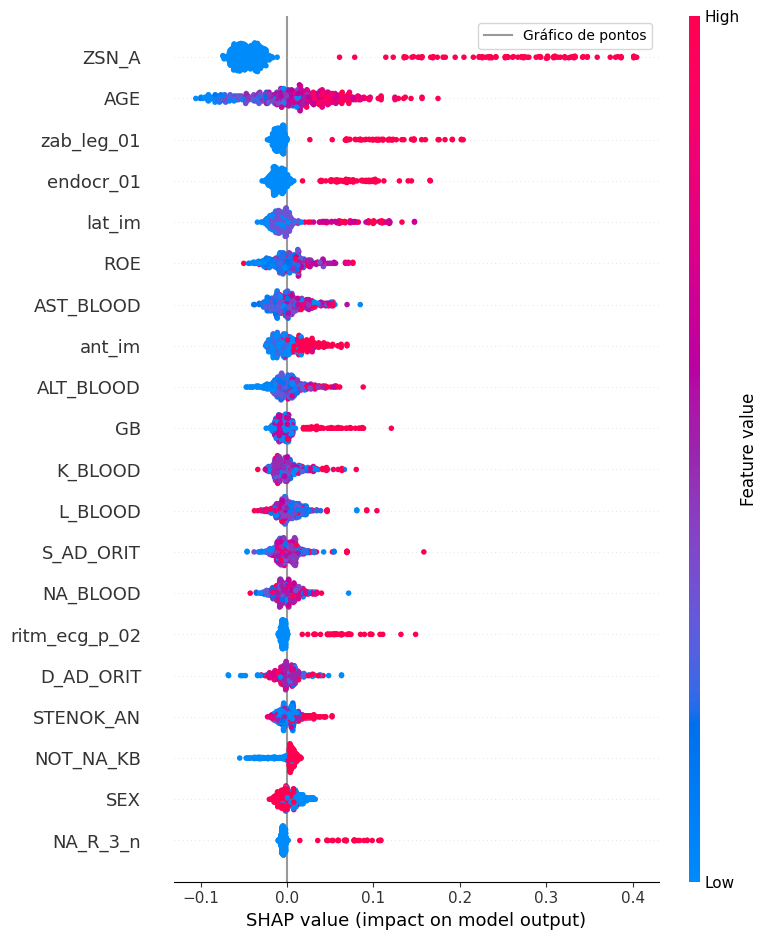

In [11]:
shap.initjs()
explainer = shap.TreeExplainer(model)
shapValues = explainer.shap_values(X_test)

shapTemp = shapValues[:,:,1]

shap.summary_plot(shapTemp, X_test, plot_type='dot', show = False)

plt.legend(['Gráfico de pontos'])
plt.show()